## Prediction of the German transport demand for 2050 using Linear Regression

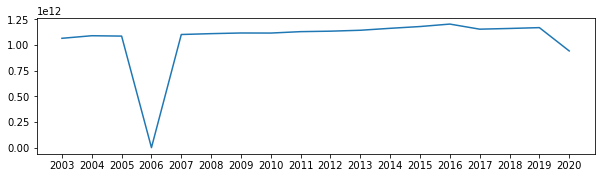

In [1]:
#Importing the packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Upload the data
header = ['year', 'tdemand'] # changing the headers
dtypes = {'year':'str', 'tdemand':'float'} # changing the dtypes from object to strings and float
df = pd.read_csv('Data_Task_MA.csv', sep=';', header=0, names=header, dtype=dtypes)

# Plotting the graph and identifying outliers
x = df['year']
y = df['tdemand']
plt.figure(figsize=(10,2.5))    
plt.plot(x, y)
plt.xticks(x[::1],  rotation='horizontal')
plt.show()

In [2]:
# discriptive stat
df.describe()

,tdemand
count,1.800000e+01
mean,1.060272e+12
std,2.707290e+11
min,1.099000e+05
25%,1.094175e+12
50%,1.124450e+12
75%,1.160275e+12
max,1.204800e+12


### We use this model: Demand = β0 + β1*Year + e

In [3]:
# Prediction 1
x=df.iloc[:,:-1].values  # arrange the dataframes so that we can run the regression
y=df.iloc[:,1].values  # same as above

# Prepare the linear regression model
model = LinearRegression() # we call it 'model'
model.fit(x, y) 

y_pred = model.predict(x)
y_pred 

array([9.33280134e+11, 9.48220380e+11, 9.63160627e+11, 9.78100873e+11,
       9.93041119e+11, 1.00798137e+12, 1.02292161e+12, 1.03786186e+12,
       1.05280211e+12, 1.06774235e+12, 1.08268260e+12, 1.09762284e+12,
       1.11256309e+12, 1.12750334e+12, 1.14244358e+12, 1.15738383e+12,
       1.17232408e+12, 1.18726432e+12])

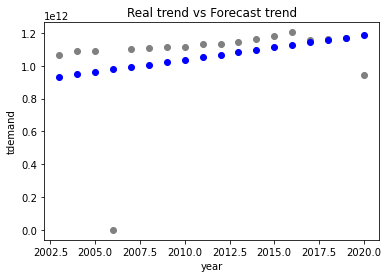

In [4]:
# Plot the real and the predicted trend
plt.scatter([[x]], [[y]],  color='grey')
plt.scatter([[x]], [[y_pred]],  color='blue')
plt.xlabel('year')
plt.ylabel('tdemand')
plt.title('Real trend vs Forecast trend')
plt.show()

### Transportation demand forecast for 2050

In [5]:
# Forecast the transportation demad for 2050
forecast_2050 = model.predict([[2050]])
forecast_2050 # the model tells that in 2050 transport demand will be 1.63547172e+12 km

array([1.63547172e+12])

In [6]:
# Show the coefficient y and the intercept
model.coef_, model.intercept_

(array([1.49402464e+10]), -28992033466509.848)

In [8]:
# R-squred, to show how well the model is explained
rsq = r2_score(y, y_pred)
rsq

0.0867942148688291

In [9]:
# Comparison between the real data and the predicted data

df1 = pd.DataFrame({'Actual': y, 'Predicted': y_pred }) # put bot y and y_pred in the same dataframe
df1

,Actual,Predicted
0,1.066100e+12,9.332801e+11
1,1.091200e+12,9.482204e+11
2,1.087600e+12,9.631606e+11
3,1.099000e+05,9.781009e+11
4,1.103100e+12,9.930411e+11
5,1.111500e+12,1.007981e+12
6,1.117900e+12,1.022922e+12
7,1.117200e+12,1.037862e+12
8,1.131000e+12,1.052802e+12
9,1.135600e+12,1.067742e+12
